# Import Basic Libraries

In [22]:
# ========== 1. Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, skew, kurtosis

# Set visualization style

In [7]:
# Set visualization style
sns.set(style="whitegrid")

# Load the Dataset from CSV file

In [8]:
# ========== 2. Load Dataset ==========
df = pd.read_csv("parkinsons.data")
print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (195, 24)


# Data Preprocessing

In [9]:
# ========== 3. Data Preprocessing ==========
df.drop(columns=['name'], inplace=True)  # Remove identifier column
print("\nMissing Values:", df.isnull().sum().sum())  # Check missing values
df['status'] = df['status'].astype('category')  # Convert target to categorical
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)  # Clean column names


Missing Values: 0


# Dataset Overview

In [10]:
# ========== 4. Dataset Overview ==========
print("\n--- First 5 Rows ---\n", df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Unique Values per Column ---\n", df.nunique())


--- First 5 Rows ---
    MDVP_Fo_Hz_  MDVP_Fhi_Hz_  MDVP_Flo_Hz_  MDVP_Jitter_  MDVP_Jitter_Abs_  \
0      119.992       157.302        74.997       0.00784           0.00007   
1      122.400       148.650       113.819       0.00968           0.00008   
2      116.682       131.111       111.555       0.01050           0.00009   
3      116.676       137.871       111.366       0.00997           0.00009   
4      116.014       141.781       110.655       0.01284           0.00011   

   MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB_  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer_DDA      NHR     HNR  status      RPDE       DFA   s

# Target Variable Distribution

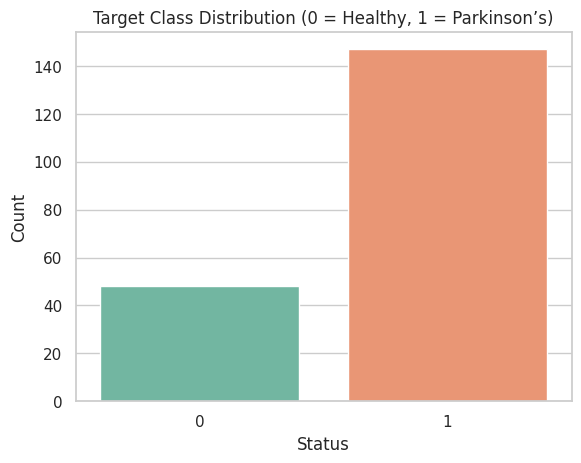

In [12]:
# ========== 5. Target Variable Distribution ==========
sns.countplot(x='status', data=df, palette='Set2', hue='status', legend=False)
plt.title('Target Class Distribution (0 = Healthy, 1 = Parkinson’s)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

🎯 Insight -
**Target** Class Distribution:
This countplot shows the number of samples in each class of the target variable `status`, where 0 indicates healthy and 1 indicates Parkinson's disease. A noticeable class imbalance is observed, with more samples labeled as Parkinson’s, indicating the dataset is skewed toward the disease class. This imbalance may affect the performance of classification models.

# Correlation heatmap

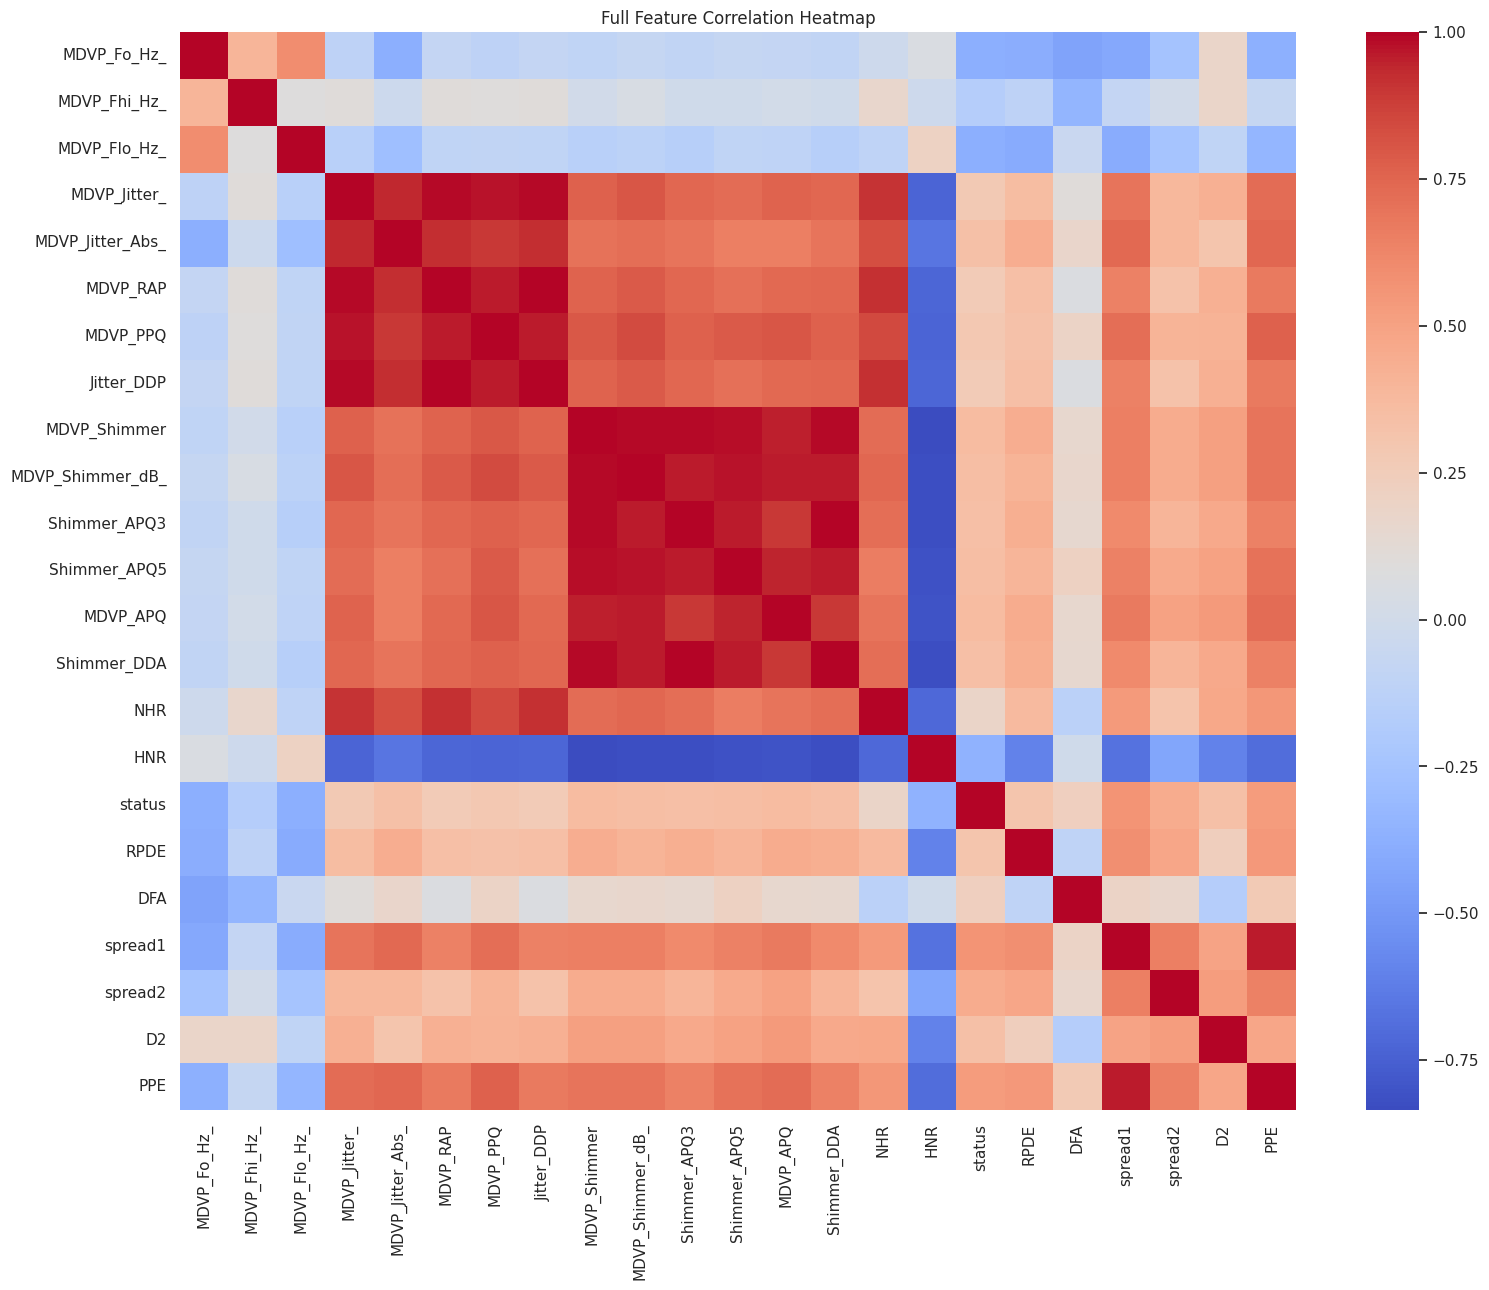

In [13]:
# ========== 6. Correlation Heatmap ==========
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Full Feature Correlation Heatmap")
plt.show()

🔗 Insight - **Correlation Heatmap** of All Features:
This heatmap visualizes the correlation coefficients between all numerical features. Features with high positive or negative correlation may contain redundant information. For instance, if two features are highly correlated, one may be removed during feature selection to reduce multicollinearity.

# Top Correlated Features With Target

In [14]:
# ========== 7. Top Correlated Features with Target ==========
target_corr = df.corr()['status'].sort_values(ascending=False)
top_features = target_corr[1:9].index.tolist()
print("Highly Correlated Features with Target:\n", top_features)

Highly Correlated Features with Target:
 ['spread1', 'PPE', 'spread2', 'MDVP_Shimmer', 'MDVP_APQ', 'Shimmer_APQ5', 'MDVP_Shimmer_dB_', 'Shimmer_APQ3']


# Histograms of Top Features

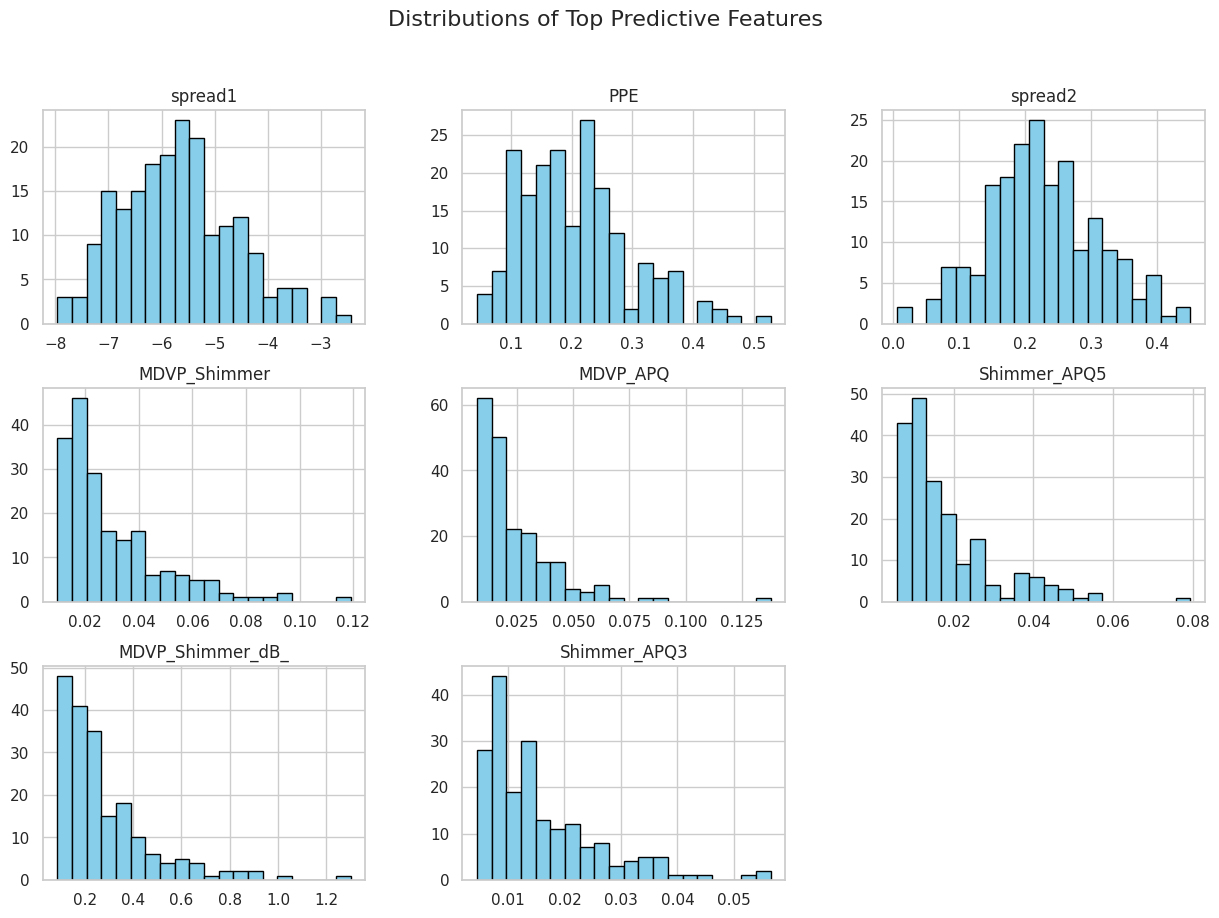

In [15]:
# ========== 8. Histograms of Top Features ==========
df[top_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Top Predictive Features", fontsize=16)
plt.show()

📉 Insight - **Histograms of Top Correlated Features**:
These histograms show the distribution of the most predictive features. Comparing these distributions helps identify whether a feature separates the two classes well. Strongly bimodal or shifted distributions often indicate high predictive power.

# Histrogram of Selected Features

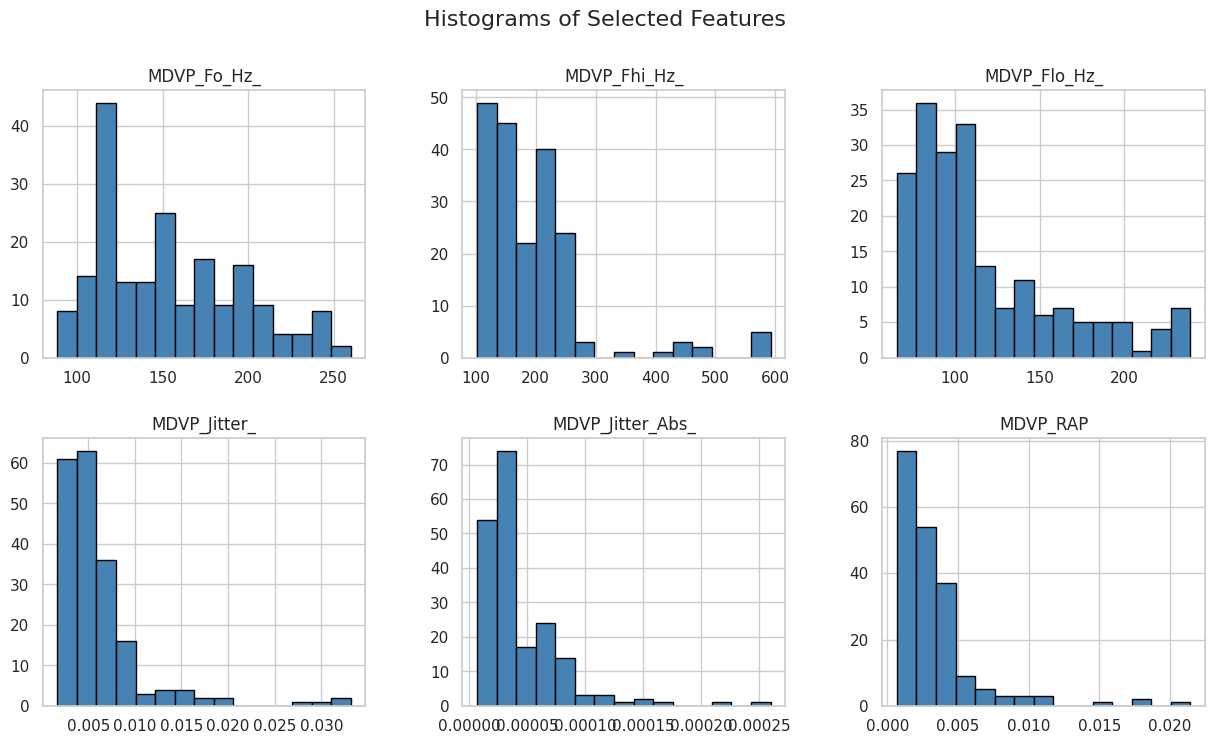

In [23]:
# ====== 9. Histograms of Selected Features
selected_features = df.drop(columns='status').columns[:6]
df[selected_features].hist(bins=15, figsize=(15, 8), layout=(2, 3), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Selected Features", fontsize=16)
plt.show()

📈 Insight- **Histograms of Selected Features**:
The histograms show the distribution of the first six features. Some features exhibit skewness, indicating non-normal distributions, which can influence the performance of algorithms sensitive to feature distributions. Feature scaling or transformation may be required for modeling.

# Boxplot by Status

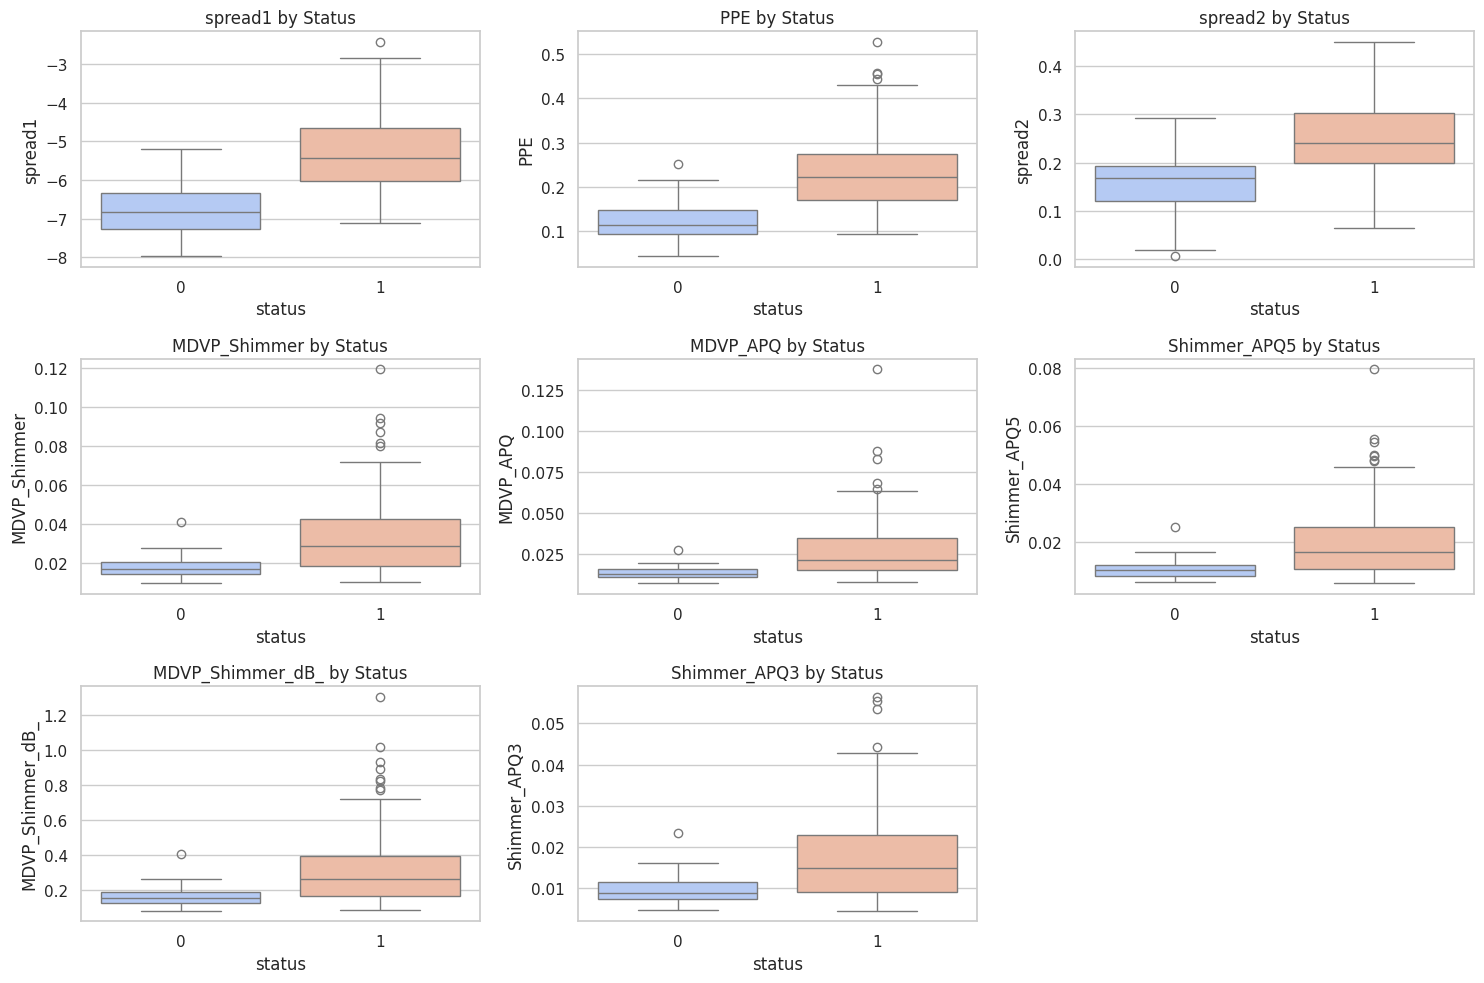

In [17]:
# ========== 10. Boxplots by Status ==========
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='status', y=col, data=df, palette='coolwarm', hue ='status', legend=False)
    plt.title(f'{col} by Status')
plt.tight_layout()
plt.show()

🎯 Insight - **Boxplots of Selected Features by Status**:
Boxplots show how the distribution of each selected feature differs between the two classes. Features with non-overlapping medians between status 0 and 1 are potentially strong predictors. Outliers can also be identified from these plots.

# Violin Plot of Top Correlated Features

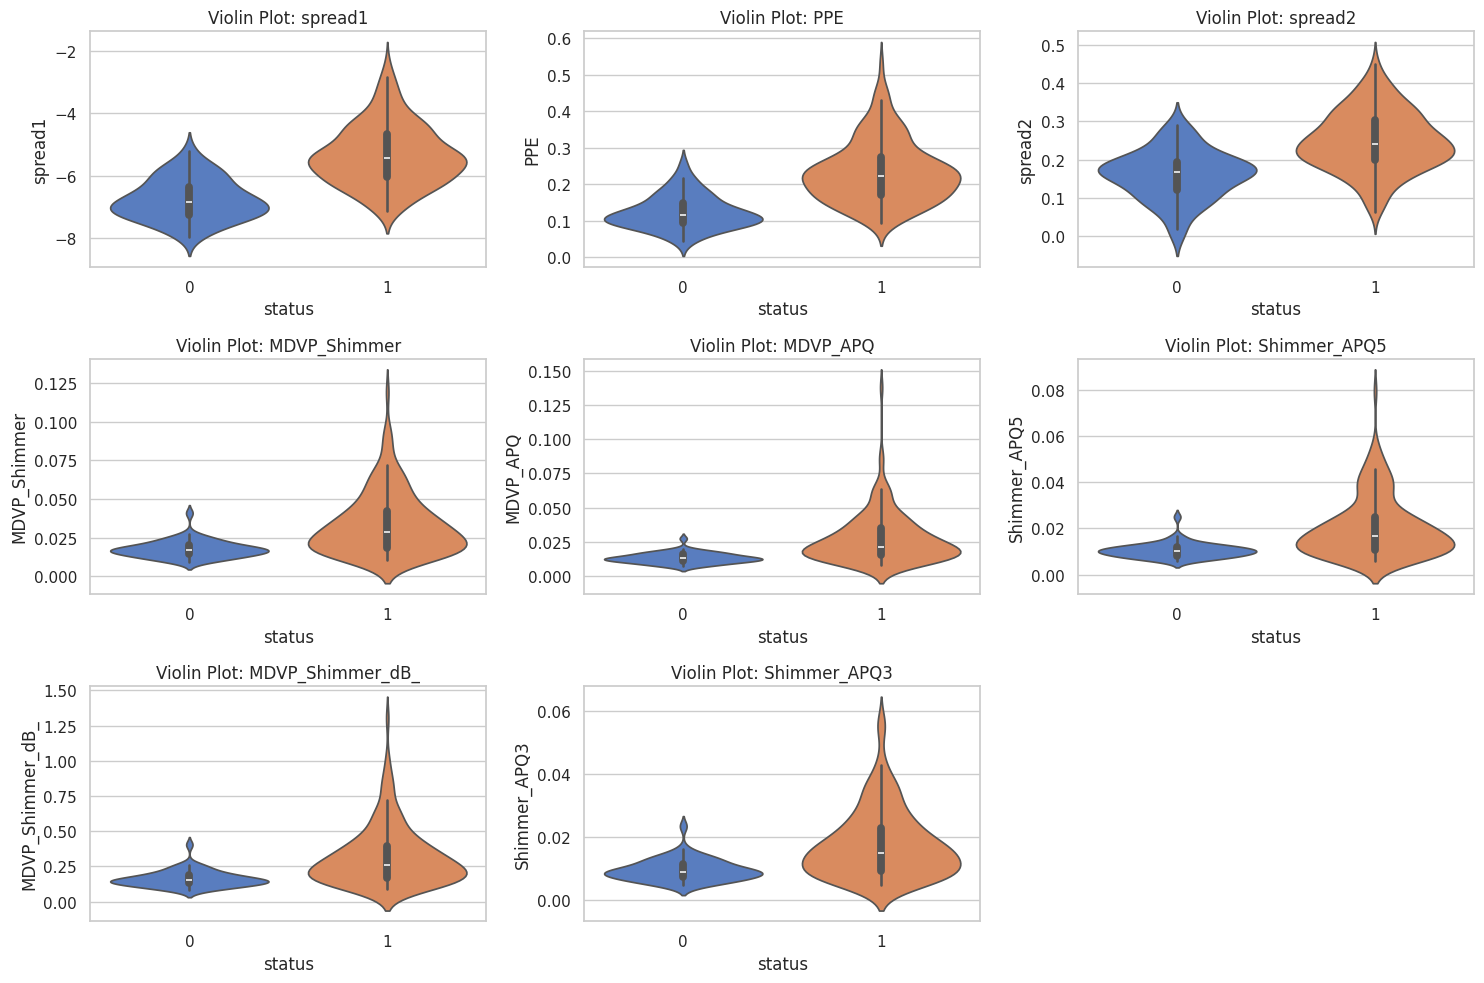

In [19]:
# ========== 11. Violin Plots ==========
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='status', y=col, data=df, palette='muted', hue='status',legend=False)
    plt.title(f'Violin Plot: {col}')
plt.tight_layout()
plt.show()

🎻 Insight - **Violin Plots of Top Correlated Features**:
Violin plots show both the density distribution and spread of features by class. They provide a richer visual than boxplots, allowing one to see multimodal behavior within each class.

# Pairplot (Top features)

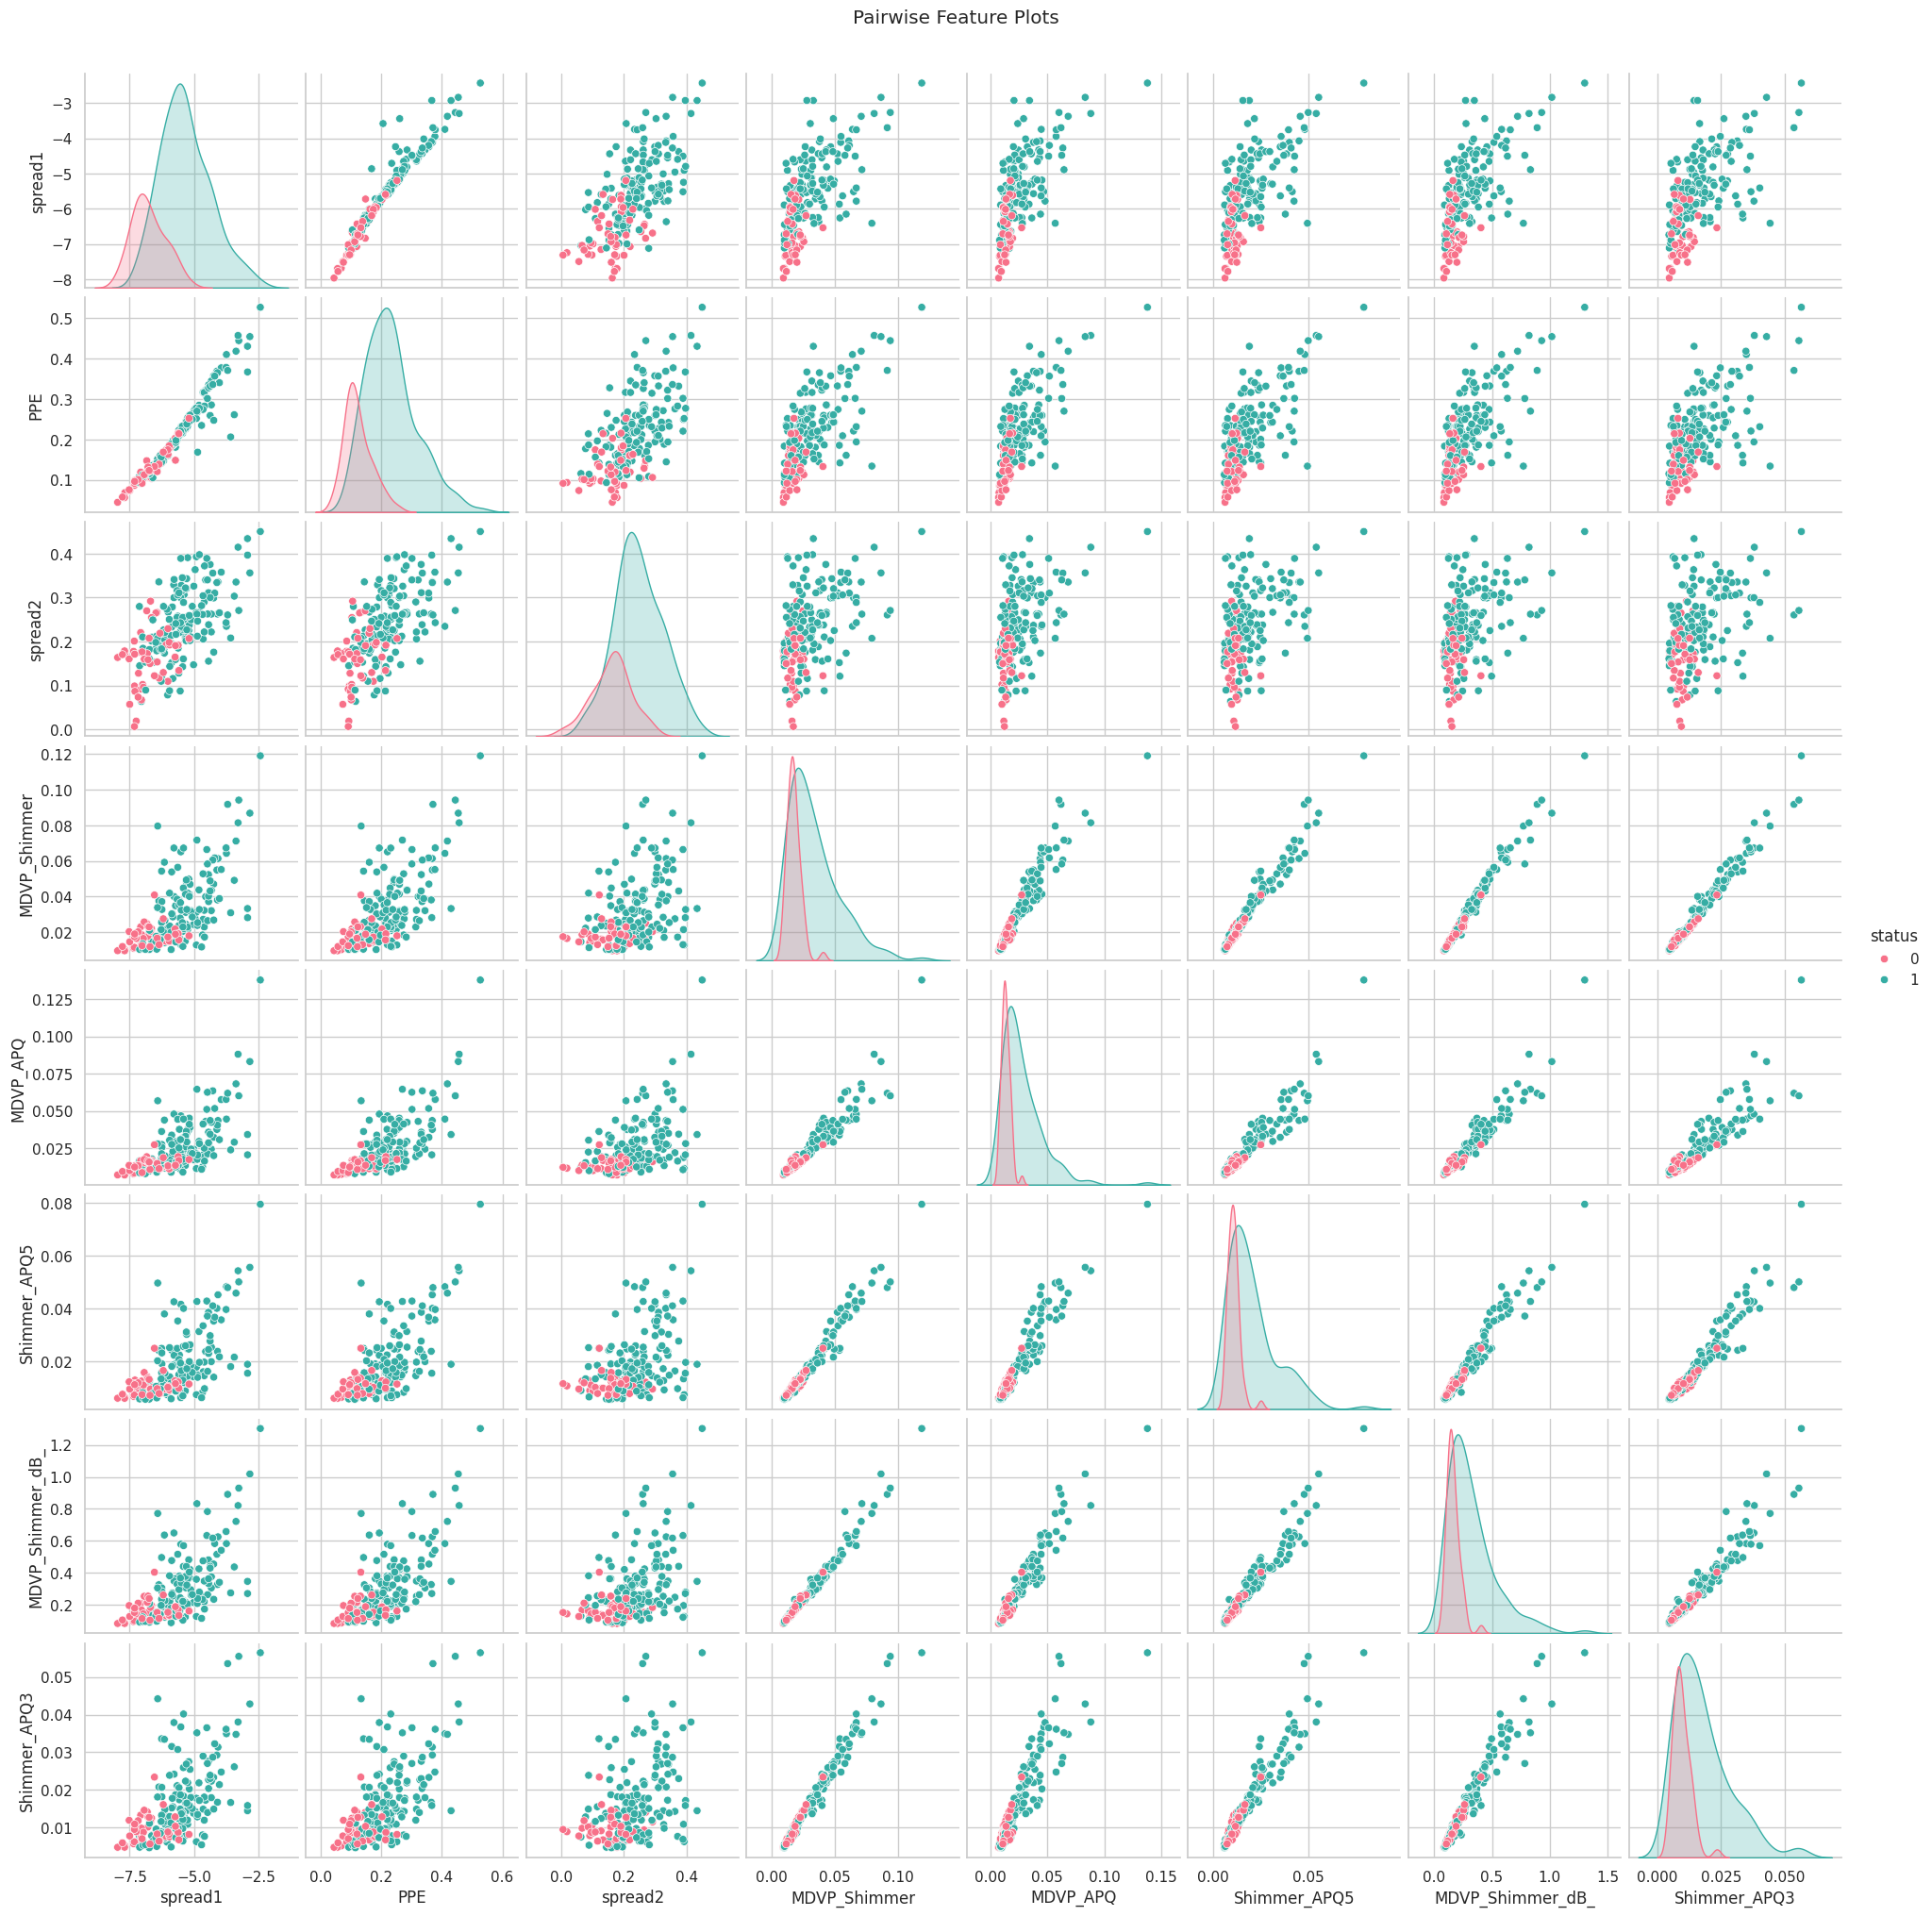

In [20]:
# ========== 12. Pairplot (Top Features) ==========
sns.pairplot(df[['status'] + top_features], hue='status', palette='husl')
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

🧪 Insight - **Pairplot of Selected Features**:
Pairplots display scatterplots of selected features with class-based coloring. Clusters and separations between classes indicate how well these features might help in classification. Diagonal histograms offer a quick glance at distribution per class.

# T-Test Summary

In [21]:
# ========== 13. T-Test Summary ==========
ttest_summary = {}
for col in df.columns:
    if col != 'status':
        healthy = df[df['status'] == 0][col]
        parkinsons = df[df['status'] == 1][col]
        t_stat, p_val = ttest_ind(healthy, parkinsons, nan_policy='omit')
        ttest_summary[col] = {'t_statistic': round(t_stat, 4), 'p_value': round(p_val, 6)}

ttest_df = pd.DataFrame(ttest_summary).T.sort_values(by='p_value')
print("\n--- T-Test Results ---\n", ttest_df.head(10))


--- T-Test Results ---
               t_statistic   p_value
MDVP_Fo_Hz_        5.7695  0.000000
MDVP_Flo_Hz_       5.7108  0.000000
Shimmer_APQ5      -5.2101  0.000000
MDVP_Shimmer      -5.4884  0.000000
MDVP_APQ          -5.4347  0.000000
HNR                5.3866  0.000000
spread1           -9.5092  0.000000
spread2           -7.0953  0.000000
PPE               -8.7065  0.000000
Shimmer_DDA       -5.1503  0.000001


🧪 Insight - **T-Test on Top Correlated Features**:
T-tests were performed to statistically test if the means of features differ between the two classes. Low p-values (< 0.05) indicate significant differences, justifying the use of these features for classification tasks.

# Descriptive Statistics

In [25]:
# ========== 13. Descriptive Statistics ==========
summary = df.describe().T
summary['skewness'] = df.drop(columns='status').skew()
summary['kurtosis'] = df.drop(columns='status').kurtosis()
print("\n--- Descriptive Stats with Skewness & Kurtosis ---\n", summary.round(3))


--- Descriptive Stats with Skewness & Kurtosis ---
                   count     mean     std      min      25%      50%      75%  \
MDVP_Fo_Hz_       195.0  154.229  41.390   88.333  117.572  148.790  182.769   
MDVP_Fhi_Hz_      195.0  197.105  91.492  102.145  134.862  175.829  224.206   
MDVP_Flo_Hz_      195.0  116.325  43.521   65.476   84.291  104.315  140.019   
MDVP_Jitter_      195.0    0.006   0.005    0.002    0.003    0.005    0.007   
MDVP_Jitter_Abs_  195.0    0.000   0.000    0.000    0.000    0.000    0.000   
MDVP_RAP          195.0    0.003   0.003    0.001    0.002    0.002    0.004   
MDVP_PPQ          195.0    0.003   0.003    0.001    0.002    0.003    0.004   
Jitter_DDP        195.0    0.010   0.009    0.002    0.005    0.007    0.012   
MDVP_Shimmer      195.0    0.030   0.019    0.010    0.017    0.023    0.038   
MDVP_Shimmer_dB_  195.0    0.282   0.195    0.085    0.148    0.221    0.350   
Shimmer_APQ3      195.0    0.016   0.010    0.005    0.008    0.013

📊 Insight - **Statistical Summary with Skewness and Kurtosis**:
The printed summary table includes basic statistics (mean, std, min, max) along with skewness and kurtosis. Skewness indicates asymmetry in feature distributions, and kurtosis measures the "tailedness." High skewness/kurtosis may suggest outliers or need for normalization.

# Descriptive Statistics Heatmap

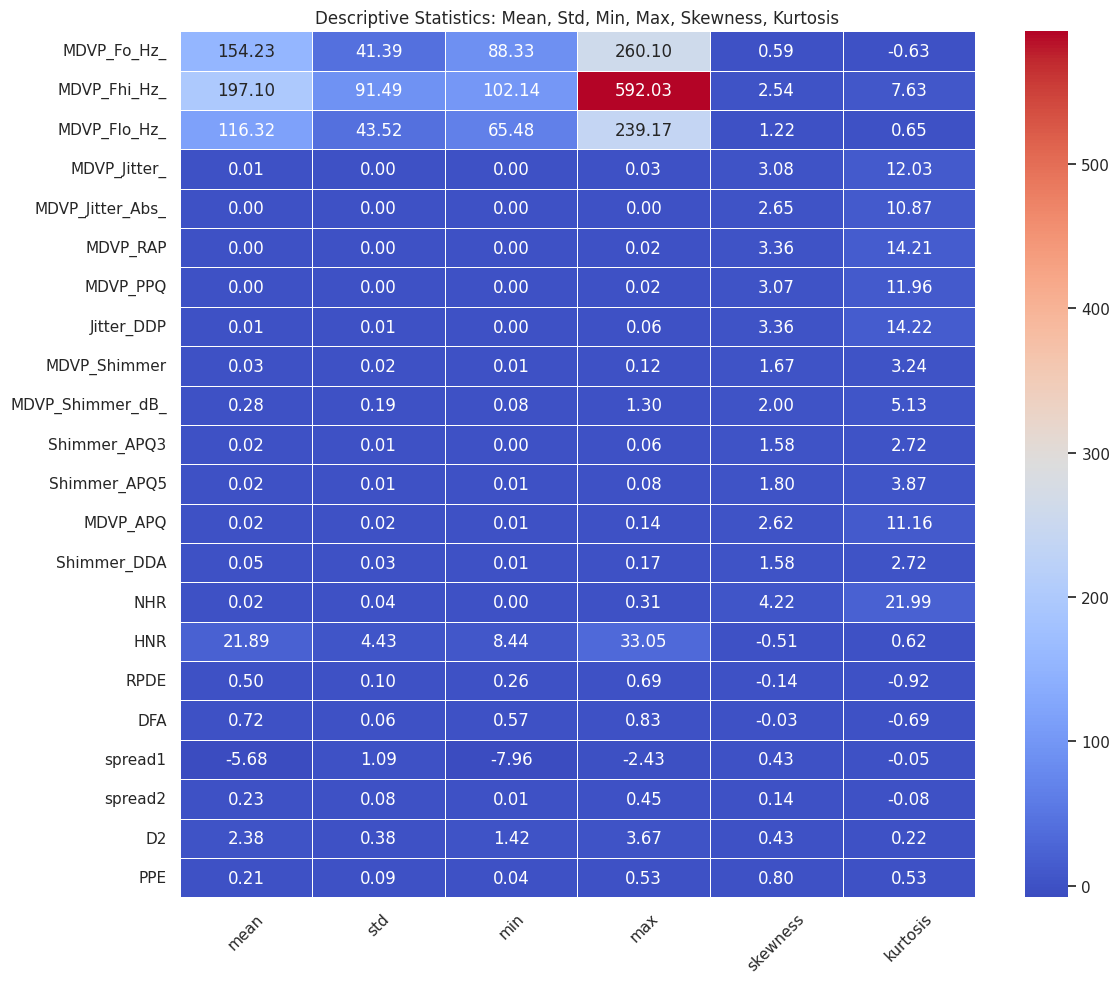

In [27]:
# ======= 14. Descriptive Statistics Heatmap ====

# Select only numeric columns and round for readability
summary_plot = summary[['mean', 'std', 'min', 'max', 'skewness', 'kurtosis']].round(2)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(summary_plot, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Descriptive Statistics: Mean, Std, Min, Max, Skewness, Kurtosis")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

📊 Insight - **Heatmap Summary**:
The heatmap shows that many voice features (like jitter and shimmer) have high **skewness** and **kurtosis**, indicating non-normal distributions with extreme values or outliers. Features like `NHR` and `MDVP_Fhi_Hz` are especially skewed and peaked, suggesting they may require transformation. In contrast, features like `PPE`, `RPDE`, and `D2` are more normally distributed and stable for modeling.

# Value Counts for Target

In [26]:
# ====== 15. Value Counts for Target ======
print("\nValue counts for target column 'status':")
print(df['status'].value_counts())


Value counts for target column 'status':
status
1    147
0     48
Name: count, dtype: int64


🧮 Insight - **Value Counts for Target**:
Reaffirming the target distribution: more patients with Parkinson’s than healthy subjects. Class imbalance should be addressed during modeling using techniques like resampling or weighted metrics.